In [98]:
#laod CSV File as pd and name titanic_data
#load needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


titanic_data=pd.read_csv("titanic-data.csv")



In [99]:
#Questions I'd like to explore:
#1.  Were the survivors more likely to be women or children?
#2.  Did the cost of the ticket matter in survivability?

In [100]:
#Based on my questions, I know I need to ensure the following fields are clean:  Survived, Pclass, Sex and Age
#I'll check these one at time staring with Survived
titanic_data.Survived.value_counts().sort_index()
#based on 891 records, it appears 'Survived' is clean

0    549
1    342
Name: Survived, dtype: int64

In [101]:
#check # of records for Pclass
#based on 891 records, it appears 'Pclass' is clean
titanic_data.Pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [102]:
#check # of records for Sex
#based on 891 records, it appears 'Sex' is clean
titanic_data.Sex.value_counts().sort_index()

female    314
male      577
Name: Sex, dtype: int64

In [103]:
#check # of records for Age
#I cant immediately determine if all passengers are assisgned an age
titanic_data.Age.value_counts().sort_index()


0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
23.50     1
24.00    30
24.50     1
25.00    23
26.00    18
27.00    18
28.00    25
28.50     2
29.00    20
30.00    25
30.50     2
31.00    17
32.00    18
32.50     2
33.00    15
34.00    15
34.50     1
35.00    18
36.00    22
36.50     1
37.00     6
38.00    11
39.00    14
40.00    13
40.50     2
41.00     6
42.00    13
43.00     5
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.0

In [104]:
#check # of records for Age
#from this query its clear that only 714 passengers have been assigned an age
titanic_data.Age.value_counts().sort_index().sum()

714L

In [105]:
#use this to see data when needed
#max rows = 1000 so i can see all data
#I'm going to run this to ensure my above findings make sense.  It seems to as the only column missing
#  data from the fields i searched is Age. (note I did expand this to n=891 and looked at as well)
pd.options.display.max_rows = 1000
print titanic_data.head(n=30)

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
2

In [106]:
#replace non numeric data in Age with the average age of all passengers
titanic_data['Age'] = np.where(pd.isnull(titanic_data['Age']), titanic_data['Age'].mean(),titanic_data['Age'])

In [107]:
#verify this indeed made a difference and I have 891 passengers with an 'Age'
#note the average age which was used is 29.699118
pd.options.display.max_rows = 1000
print titanic_data['Age'].head(n=30)
titanic_data.Age.value_counts().sort_index().sum()

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
25    38.000000
26    29.699118
27    19.000000
28    29.699118
29    29.699118
Name: Age, dtype: float64


891L

In [108]:
#magic.....really. I learned this command will activate pylab (matplotlib, numpy and interactive support)
#still trying to understand the importance of this but i think i need to populate interactive namespace.
#its like the 'import' commands but you dont need to 'import'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [109]:
#look at subset of data.  For question 1 i care more about the Survived, Sex and Age fields
titanic_subset=titanic_data.groupby(['PassengerId', 'Survived', 'Sex', 'Age'])
print titanic_subset['Survived'].first().head(n=15)



PassengerId  Survived  Sex     Age      
1            0         male    22.000000    0
2            1         female  38.000000    1
3            1         female  26.000000    1
4            1         female  35.000000    1
5            0         male    35.000000    0
6            0         male    29.699118    0
7            0         male    54.000000    0
8            0         male    2.000000     0
9            1         female  27.000000    1
10           1         female  14.000000    1
11           1         female  4.000000     1
12           1         female  58.000000    1
13           0         male    20.000000    0
14           0         male    39.000000    0
15           0         female  14.000000    0
Name: Survived, dtype: int64


In [110]:
#The 4 fields i care about are PassengerID, Survived, Sex and Age for question #1
#From this we can see 38.38% of the passengers survived

four_fields=titanic_data[['PassengerId', 'Survived', 'Sex', 'Age']].describe()
four_fields




,PassengerId,Survived,Age
count,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118
std,257.353842,0.486592,13.002015
min,1.000000,0.000000,0.420000
25%,223.500000,0.000000,22.000000
50%,446.000000,0.000000,29.699118
75%,668.500000,1.000000,35.000000
max,891.000000,1.000000,80.000000


In [111]:
#sex_at_launch is not what you expected.....it is the number of each sex at time of launch
sex_at_launch=titanic_data.groupby(['Sex'])['Pclass'].count()
sex_at_launch

Sex
female    314
male      577
Name: Pclass, dtype: int64

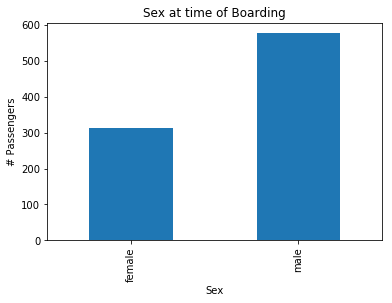

In [112]:
#Graphically, the division by sex_at_launch looks like this
#titanic_data.groupby(['Sex'])[['PassengerId']].count().plot(kind='bar').set_ylabel('# Passengers')
sex_at_launch.plot(kind='bar', title ="Sex at time of Boarding").set_ylabel('# Passengers')

In [113]:
#by number of each sex by survivors looks like this
survivors=titanic_data.groupby(['Sex'])['Survived'].sum()
survivors

Sex
female    233
male      109
Name: Survived, dtype: int64

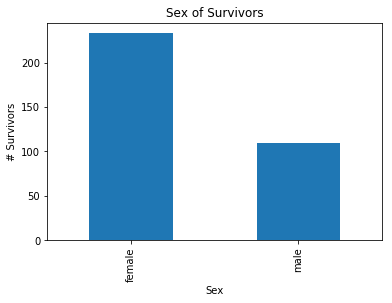

In [114]:
#graphically it looks like this.....
#Even though we started with 577 males, there were over twice as many surviving females.

#the below code was not used and I was just experiementing
#titanic_data.groupby(['Sex' ])[['Survived']].count().stack().plot(kind='bar').set_ylabel('Count')
#df_sex_survived = titanic_data[(titanic_data.Survived)==1]
#df_sex_survived.groupby(['Sex'])[['Survived']].sum().plot(kind='bar').set_ylabel('# Survived by Sex')
#plt.show()

survivors.plot(kind='bar', title ="Sex of Survivors").set_ylabel('# Survivors')

In [115]:
#I can tell that only 12.22% of the survivesrs were males survived and 26.15% of the survivors were females
# even though at launch 64.76% were males and 35.24% were females
ratio=titanic_data.groupby(['Sex'])['Survived'].sum()/891
ratio

Sex
female    0.261504
male      0.122334
Name: Survived, dtype: float64

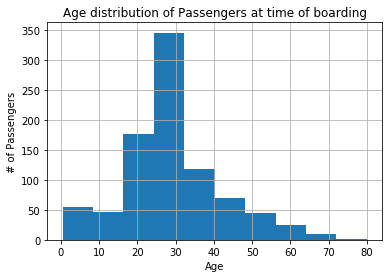

In [116]:
#here's a histogram of the age of the passengers at time of boarding
ax = titanic_data['Age'].hist()
ax.set_ylabel('# of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age distribution of Passengers at time of boarding')


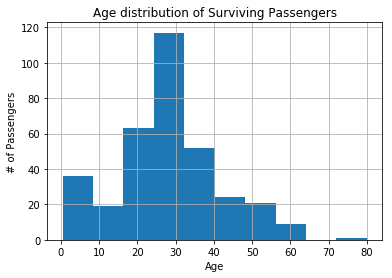

In [117]:
#here's a histogram of the age of the surviving passengers
#There was a bias to protect the individuals below 20 years old

df_sex_survived = titanic_data[(titanic_data.Survived)==1]
ax = df_sex_survived['Age'].hist()
ax.set_ylabel('# of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age distribution of Surviving Passengers')


In [118]:

#separate the categories by age so I can see graphically their ages

titanic_data['age_categories'] = pd.cut(titanic_data['Age'], bins = [0,18,40,81],labels=['child','adult','senior'])

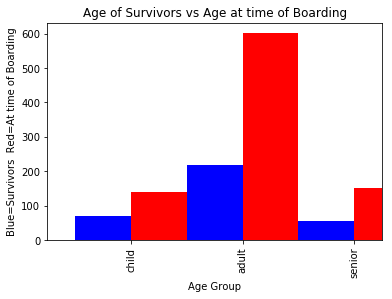

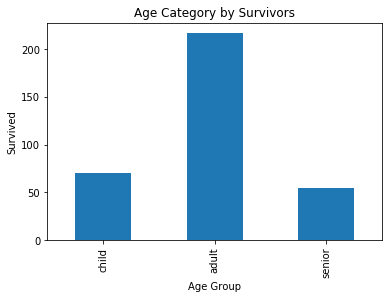

In [119]:
#create comparison bar graph of survivors by age_categoires vs passengers at time of boarding by age_categories
#from the graph below it appears there was a concerted effort to save youth over the aged

ax = titanic_data.groupby('age_categories')['Survived'].count().plot(kind='bar', color='red', position=0, title ="Age of Survivors vs Age at time of Boarding")
ax2 = titanic_data.groupby('age_categories')['Survived'].sum().plot(kind='bar', color='blue', position=1)
ax.set_xlabel("Age Group")
ax.set_ylabel("Blue=Survivors  Red=At time of Boarding")
plt.show()

ax = titanic_data.groupby('age_categories')['Survived'].sum().plot(kind='bar', title ="Age Category by Survivors")
ax.set_xlabel("Age Group")
ax.set_ylabel("Survived")
plt.show()

In [120]:
#In general, in response to Q#1 woman had a much higher survivability rate than men.  See Conclusion below

#Younger people also had a greater surviviability rate but that really was only mildly visible.  See Conclusion below.

In [147]:
#for question #2 get subset of data
#also check that I have 891 Fare's listed
titanic_subset2=titanic_data.groupby(['PassengerId', 'Survived', 'Fare', 'Pclass'])
titanic_subset2.Fare.value_counts().sort_index().sum()


891L

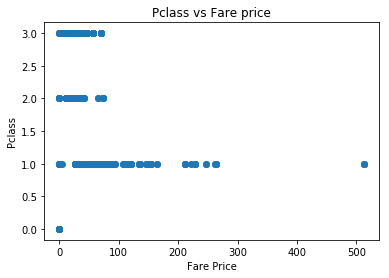

In [149]:
#run scatter plot to validate that Pclass 1 had highest fares and Pclass 3 the least expensive fares
#verify there is a correlation between fare and Pclass

#plt.scatter(x=titanic_subset2['Fare'],y=titanic_subset2['Pclass'])

plt.scatter(titanic_subset2['Fare'],titanic_subset2['Pclass'])
plt.xlabel('Fare Price')
plt.ylabel('Pclass')
plt.title('Pclass vs Fare price')


In [123]:
#to look at the count by Pclass at time of booking, I can do the following

titanic_data.groupby(['Pclass'])['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [124]:
#to look at the count by Pclass by survival, i can do the following

titanic_data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

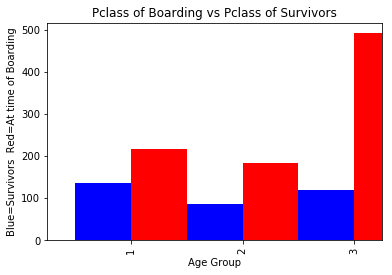

In [125]:
#create a bar graph comparing the survivors by Pclass to the original passengers by Pclass

ax = titanic_data.groupby(['Pclass'])['Survived'].count().plot(kind='bar', color='red', position=0, title ="Pclass of Boarding vs Pclass of Survivors")
ax2 = titanic_data.groupby(['Pclass'])['Survived'].sum().plot(kind='bar', color='blue', position=1)
ax.set_xlabel("Age Group")
ax.set_ylabel("Blue=Survivors  Red=At time of Boarding")
plt.show()


In [126]:
#From the above graph, it appears that, all else equal, Pclass 1 survived the most and that was the LEAST expensive class!!

In [127]:
#CONCLUSION

#1.  Were the survivors more likely to be women or children?  Yes...it seems that females had a greater likelihood to survive.
#Age did not seem to have a bearing on the survivability of folk after about 20 years of age.

#In general, in response to Q#1 woman had a much higher survivability rate than men.  this could be due to a number of factors
#My first assumption is that "women and children first" mentality ruled and women were given preferences in the lifeboats.
#This may or may not be true, however as it could have been that the men were all very old or the men were poor swimmers.
#We can not make an absolute statement as there may have been other factors which we are not aware of and we 
#did not overlay other factors such as Pclass and whether their cabins were on upper or lower decks.

#Younger people also had a greater surviviability rate but that really was only mildly visible and in the folks younger than 19.
#Further, there were 177 people who did not have an age and we assigned them the average age.  This may wildly impact the
#findings.  Lastly, I did not overlay sex and Pclass on age which may also have had an impact.
#2.  Did cost of the ticket matter in survivability?  In general, it appears the lower priced Class (Pclass 1) had a higher
#likilihood of survival.  Here again, this is merely an observation and not scientific as there were many other factors which
#need to be taken into consideration such as Sex, where on the ship their cabin was located and Age.